In [287]:
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [288]:
google_comment_df = pd.read_csv("/content/1.csv")
google_comment_df2 = pd.read_csv("/content/2.csv")
google_comment_df3 = pd.read_csv("/content/3.csv")
google_comment_df4 = pd.read_csv("/content/4.csv")
google_comment_df5 = pd.read_csv("/content/5.csv")
google_comment_df6 = pd.read_csv("/content/6.csv")

In [289]:
google_comment_df

,評論者,評等,評語
0,林家彰,4,服務好，烤網換的速度比吃肉還快！！
1,C.K. WU,3,慕名已久，第一次吃，整體來說CP值高，口感跟口味算有水準，但不會讓我覺得去台中一定要再訪。
2,Ted Chen,5,肉品水準很高，服務到位，訓練有素，已再次享用燒肉晚餐數次，每次都很滿意！
3,吳尾熊,5,好吃 食材新鮮 服務態度又很好👍
4,柯昇佑,5,(由 Google 提供翻譯) 好吃(原始評論)好吃
...,...,...,...
3655,榮康,5,(由 Google 提供翻譯) 好吃(原始評論)好吃
3656,Y un,5,環境優美 服務良好
3657,蔡奕民,4,肉的品質都不錯
3658,郭裔民,3,好吃 cp值普普


In [290]:
def convertScore(score): 
     if score >= 4:
        return 'good'
     else:
        return 'bad'


def Convert(google):
     google['status'] = google['評等'].map(lambda e : convertScore(e))
     google = google[google['status'].isin(['good', 'bad'])]
     google['status'] = google['status'].replace({'good':1, 'bad': 0})
     google = google.drop(columns = ['評等','評論者'])
     return google


google_comment_df = Convert(google_comment_df)
google_comment_df2 = Convert(google_comment_df2)
google_comment_df3 = Convert(google_comment_df3)
google_comment_df4 = Convert(google_comment_df4)
google_comment_df5 = Convert(google_comment_df5)
google_comment_df6 = Convert(google_comment_df6)


#接著我們把所有dataframe整合成一個google dataframe

google_comment_df


,評語,status
0,服務好，烤網換的速度比吃肉還快！！,1
1,慕名已久，第一次吃，整體來說CP值高，口感跟口味算有水準，但不會讓我覺得去台中一定要再訪。,0
2,肉品水準很高，服務到位，訓練有素，已再次享用燒肉晚餐數次，每次都很滿意！,1
3,好吃 食材新鮮 服務態度又很好👍,1
4,(由 Google 提供翻譯) 好吃(原始評論)好吃,1
...,...,...
3655,(由 Google 提供翻譯) 好吃(原始評論)好吃,1
3656,環境優美 服務良好,1
3657,肉的品質都不錯,1
3658,好吃 cp值普普,0


In [291]:
google = pd.concat([google_comment_df,google_comment_df2,google_comment_df3,google_comment_df4,google_comment_df5,google_comment_df6],ignore_index=True)

In [292]:
bad_df = google[google['status'] ==0]
bad_df.shape

(4392, 2)

In [293]:
good_df = google[   google['status'] ==1]
good_df = good_df.sample(n=1025)

In [294]:
google

,評語,status
0,服務好，烤網換的速度比吃肉還快！！,1
1,慕名已久，第一次吃，整體來說CP值高，口感跟口味算有水準，但不會讓我覺得去台中一定要再訪。,0
2,肉品水準很高，服務到位，訓練有素，已再次享用燒肉晚餐數次，每次都很滿意！,1
3,好吃 食材新鮮 服務態度又很好👍,1
4,(由 Google 提供翻譯) 好吃(原始評論)好吃,1
...,...,...
21955,(由 Google 提供翻譯) 好吃(原始評論)好吃,1
21956,環境優美 服務良好,1
21957,肉的品質都不錯,1
21958,好吃 cp值普普,0


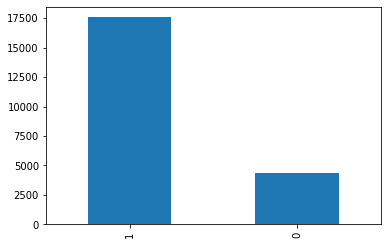

In [295]:
google['status'].value_counts().plot(kind='bar')

In [296]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(google, test_size = 0.2, random_state = 927)
train_df = pd.DataFrame(train_df)


In [297]:
!pip install -U ipykernel
!pip install modin[dask]

Requirement already up-to-date: ipykernel in /usr/local/lib/python3.6/dist-packages (5.3.4)


In [298]:
pip install simpletransformers==0.48.15

In [299]:
from simpletransformers.classification import ClassificationModel
!pip install wandb
model = ClassificationModel('bert', 'hfl/chinese-bert-wwm')
model.train_model(train_df, args = {'/content/wan': True})

Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


(2196, 0.007582551521709866)

In [300]:
result, model_output, wrong_predictions = model.eval_model(test_df)
result

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:851: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


{'eval_loss': 4.732043886139112e-06,
 'fn': 0,
 'fp': 0,
 'mcc': 1.0,
 'tn': 871,
 'tp': 3521}